# Standard Atmosphere

Aerodynamic analyses need various air properties to do the calculations. The standard way to come up with thoseproperties is to use the *Standard Atmosphere* model, published in 1976. There is a *Python* package that provides access to this model, but for our purposes, I will use methods defined in Mark Drela's *Flight Vehicle Aerodynamics*{cite}`drela2014`.

To get started with this model, we need to define the properties at sea-level. Each of these properties has engineering units attached to the number. It is critical that these units be consistent in calculations, so we will use the *Python* **pint** package to add these units to the data.

In [1]:
import pint

In [2]:
u = pint.UnitRegistry()

In [3]:
rho_SL = 1.225*u.kg/u.m**3
rho_SL

1.225 <Unit('kilogram / meter ** 3')>

In [4]:
p_SL = 1.0132e5*u.pascal
p_SL

101320.0 <Unit('pascal')>

In [5]:
T_SL = 288.15*u.kelvin
T_SL

288.15 <Unit('kelvin')>

In [6]:
a_SL = 340.3*u.m/u.sec
a_SL

340.3 <Unit('meter / second')>

In [7]:
mu_SL = 1.79e-5*u.kg/(u.m*u.sec)
mu_SL

1.79e-05 <Unit('kilogram / meter / second')>

The equations that define these properties for altitudes other than sea-level are given in Drela's book, but they originally come from the *COESA Working Group*{cite}`coesa1976`

\begin{equation}
p(z) = e^{-0.118z -\frac{0.0015z^2}{1-0.018z+0.0011z^2}}
\end{equation}

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
alt = np.linspace(0,26,27)*u.km
alt

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26.]) <Unit('kilometer')>

## Pressure vs Altitude

In [10]:
def p(z):
    zm = z.magnitude
    return p_SL*np.exp(-0.118*zm-(0.0015*zm**2)/(1-0.018*zm+0.0011*zm**2))

In [11]:
poa = p(alt)
poa

array([101320.        ,  89905.40296142,  79526.32017632,  70116.70085352,
        61614.862419  ,  53962.20127802,  47102.16817382,  40979.53120929,
        35539.93103121,  30729.71191496,  26495.99269638,  22786.92569605,
        19552.08221228,  16742.90085442,  14313.13965091,  12219.28306374,
        10420.86863549,   8880.71266742,   7565.02803376,   6443.43852153,
         5488.90218695,   4677.56102164,   3988.53608919,   3403.68686734,
         2907.35155099,   2486.08222449,   2128.38566264]) <Unit('pascal')>

In [12]:
popsl = poa/p_SL

## Temperature vs Altitude

In [13]:
def T(z):
    zm = z.magnitude
    res = 216.65 + 2.0*np.log(1 + np.exp(35.75 - 3.25*zm) + np.exp(-3.0+0.0003*zm**3))
    return res*u.kelvin

In [14]:
T(0*u.km)

288.15 <Unit('kelvin')>

In [15]:
totsl = T(alt)
totsl = totsl/T_SL

In [16]:
totsl

array([1.        , 0.9774423 , 0.95488461, 0.93232691, 0.90976922,
       0.88721152, 0.86465383, 0.84209615, 0.81953886, 0.79699181,
       0.77470447, 0.75692928, 0.7526667 , 0.75251263, 0.75261131,
       0.75275675, 0.75295585, 0.75323063, 0.75361333, 0.75414964,
       0.75490188, 0.75594953, 0.75738375, 0.75929288, 0.76174183,
       0.76475604, 0.76832105]) <Unit('dimensionless')>

## Viscosity vs Altitude

The viscosity function is given next:
    
\begin{equation}
\mu(z) = \mu(T(z)) = \mu_{SL}\left(\frac{T}{T_{SL}}
\right)^\frac{3}{2}\frac{T_{SL} + T_S}{T + T_S}
\end{equation}

From Sutherland's Law, the value for $T_S$ is $110K$ for air.

In [17]:
T_S = 110 * u.kelvin

In [18]:
temp = T(alt)
temp

array([288.15      , 281.65      , 275.15      , 268.65      ,
       262.15      , 255.65000001, 249.15000018, 242.65000477,
       236.15012335, 229.65319063, 223.23109361, 218.10917191,
       216.88090919, 216.8365151 , 216.86494841, 216.90685653,
       216.96422766, 217.04340499, 217.15368003, 217.30821958,
       217.5249759 , 217.826857  , 218.24012736, 218.79024208,
       219.49590934, 220.36445416, 221.39170975]) <Unit('kelvin')>

In [19]:
def mu(z):
    temp = T(z)
    return mu_SL*(temp/T_SL)**1.5*(T_SL + T_S)/(temp+T_S)

In [20]:
muoa = mu(alt)
muoa

array([1.79000000e-05, 1.75848358e-05, 1.72661770e-05, 1.69439289e-05,
       1.66179935e-05, 1.62882690e-05, 1.59546500e-05, 1.56170276e-05,
       1.52752944e-05, 1.49294855e-05, 1.45833845e-05, 1.43042252e-05,
       1.42368610e-05, 1.42344232e-05, 1.42359846e-05, 1.42382858e-05,
       1.42414358e-05, 1.42457825e-05, 1.42518353e-05, 1.42603155e-05,
       1.42722053e-05, 1.42887561e-05, 1.43113978e-05, 1.43415080e-05,
       1.43800844e-05, 1.44274911e-05, 1.44834561e-05]) <Unit('kilogram / meter / second')>

## Density vs Altitude

To get density we need to use the ideal gas state equation

\begin{equation}
p = \rho R T
\end{equation}

Where the gas constant is $R = 287.04\frac{J}{kgK}$

In [21]:
Rgas = 287.04*u.joule/(u.kg*u.kelvin)


In [22]:
def rho(z):
    temp = T(z)
    press = p(z)
    rho = press/(Rgas*temp)
    return rho

In [23]:
rho(alt).to_base_units()

array([1.22499449, 1.11207382, 1.00692923, 0.90926863, 0.81882897,
       0.73536243, 0.65862405, 0.58836152, 0.52430739, 0.46616921,
       0.41350721, 0.36397318, 0.31407203, 0.26900222, 0.22993396,
       0.1962592 , 0.16732983, 0.14254724, 0.12136709, 0.10329971,
       0.08790912, 0.07481103, 0.06367024, 0.0541975 , 0.04614543,
       0.03930353, 0.03349242]) <Unit('kilogram / meter ** 3')>

In [24]:
rhooa = rho(alt)
rhooa = rhooa/rho_SL

## Speed of Sound vs Altitude

The speed of sound is calculated using this formula:
    
\begin{equation}
a= \sqrt{\gamma RT}
\end{equation}

In [25]:
gamma = 1.4
def sos(z):
    temp = T(z)
    res = np.sqrt(gamma*Rgas*temp)
    return res

In [26]:
sosoa = sos(alt).to_base_units()

In [27]:
aoasl = sosoa/a_SL

/Users/rblack/_dev/mmqprop/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


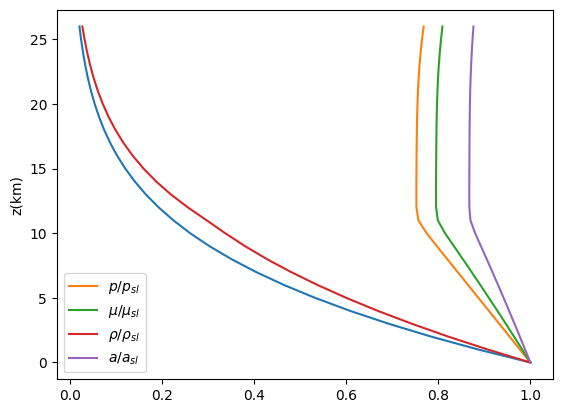

In [28]:
plt.plot(popsl,alt)
plt.ylabel("z(km)")
plt.plot(totsl, alt, label=r"$p/p_{sl}$")
plt.plot(muoa/mu_SL,alt, label=r"$\mu/\mu_{sl}$")
plt.plot(rhooa,alt, label = r"$\rho/\rho_{sl}$")
plt.plot(aoasl,alt, label = r"$a/a_{sl}$")
plt.legend()

That plot looks like the figure presented in Drela's book.

All of this code has been placed in a single class names *StdATm* which takes an altitude in meters, and returns the properties as a dictionary. We can nhand this function a ((numpy** array of altitudes is needed.)) 

In [29]:
import sys
import os
sys.path.insert(0, '../../..')
from mmqprop.StdAtm import StdAtm

In [31]:
s = StdAtm(u,alt)
s.properties().to_base_units()

array([340.28635941, 336.4264294 , 332.52169613, 328.57056228,
       324.5713333 , 320.52220891, 316.42127374, 312.26648926,
       308.05574815, 303.78859849, 299.51085849, 296.05485874,
       295.22007832, 295.18986197, 295.20921515, 295.23773766,
       295.27677977, 295.33065292, 295.40566894, 295.51076442,
       295.65810781, 295.8631938 , 296.14372291, 296.51673059,
       296.99452544, 297.58154864, 298.2743484 ]) <Unit('meter / second')>

```{eval-rst}
..literalinclude::  ../../mmqprop/StdAtm.py
```